# MNIST Data Property Collection

In [10]:
import torch
from torchvision import datasets, transforms

In [15]:
data_dir = 'data'
batch_size_train = 10
batch_size_test = 64

In [16]:
tfs = transforms.Compose([transforms.ToTensor()])

train_data = datasets.MNIST(data_dir,
                            train=True,
                            download=True,
                            transform=tfs
                            )

test_data = datasets.MNIST(data_dir,
                           train=False,
                           download=True,
                           transform=tfs)

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size_train, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=batch_size_test, 
                                          shuffle=True)

## Example of MNIST image

Label: tensor(3)
Shape: torch.Size([28, 28])


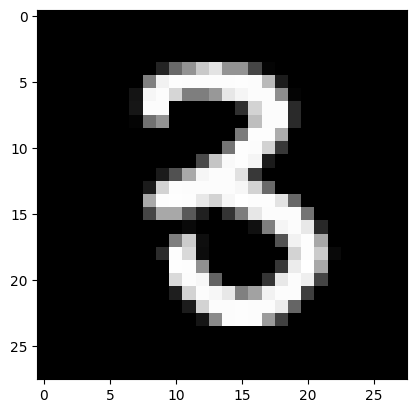

In [34]:
# import library
import matplotlib.pyplot as plt
# We can check the dataloader
example_datas, labels = next(iter(test_loader))
sample = example_datas[0][0]
# show the data
plt.imshow(sample, cmap='gray', interpolation='none')
print("Label:", str(labels[0]))
print("Shape:", sample.shape)

## Mean and Variance
https://gist.github.com/JorritWillaert/2cae1da8cd42226a184f0268c0cb58f8#file-get_mean_and_std-py

In [30]:
channels_sum, channels_squared_sum, num_batches = 0, 0, 0
for data, _ in train_loader:
    # Mean over batch, height and width, but not over the channels
    channels_sum += torch.mean(data, dim=[0,2,3])
    channels_squared_sum += torch.mean(data**2, dim=[0,2,3])
    num_batches += 1

mean = channels_sum / num_batches

# std = sqrt(E[X^2] - (E[X])^2)
std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5
print("Mean:", mean)
print("Std:", std)

Mean: tensor([0.1307])
Std: tensor([0.3081])


## Shape
For the MLP model, we flatten the image
For imagenet, 

In [44]:
data, _ = next(iter(test_loader))
MLP_shape = data.view(*data.shape[:-2], -1)
print(data.shape)
print(MLP_shape.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 784])
